# Install Requirements

In [174]:
! pip install -r notebook-requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 332.8 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 1.4 MB/s eta 0:00:0000:0100:01m

[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


# Running The Tests

In [121]:
! NUM_RUNS=1 bash autotest.sh

running sample-smart-contracts/01-mutant_killing.sol
running sample-smart-contracts/02-simple_mapping.sol
running sample-smart-contracts/03-two_TX_ovf.sol
running sample-smart-contracts/04-simple_condition_checking.sol
running sample-smart-contracts/05-simple_msg_value.sol
running sample-smart-contracts/06-simple_int_overflow.sol
running sample-smart-contracts/07-mapping_sample.sol
running sample-smart-contracts/08-dummy_mono-x.sol
running sample-smart-contracts/09-multi_TX_5.sol
running sample-smart-contracts/10-internal_call.sol
running sample-smart-contracts/11-safe_math.sol
running sample-smart-contracts/12-erc20.sol
running sample-smart-contracts/13-fuzzing.sol
running sample-smart-contracts/14-kill_billy.sol
running sample-smart-contracts/15-math_open_zeppelin.sol
running sample-smart-contracts/16-safe_remote_purchase.sol
running sample-smart-contracts/17-unprotected.sol
running sample-smart-contracts/18-address_book.sol
running sample-smart-contracts/19-hotel_room.sol
running sa

# Running Results Parser

In [122]:
! python results-parser.py > results.csv

# Average Data

In [123]:
import pandas as pd
import numpy as np

In [124]:
df = pd.read_csv('results.csv')

# Cleaning
df.rename(columns=lambda x: x.strip(), inplace=True)
df.drop(['Date'], inplace=True, axis=1)
df.sort_values('Smart Contract', inplace=True)

df

,Smart Contract,#LoC,# Generated Walks,# CFG Nodes,Execution Time (s),Heuristic
186,01-mutant_killing.sol [mutant_killing],11,6,12,0.078,floyd_warshall is selected
39,01-mutant_killing.sol [mutant_killing],11,6,12,0.075,floyd_warshall is selected
229,01-mutant_killing.sol [mutant_killing],11,6,12,0.130,floyd_warshall is selected
77,01-mutant_killing.sol [mutant_killing],11,6,12,0.074,floyd_warshall is selected
83,01-mutant_killing.sol [mutant_killing],11,6,12,0.110,floyd_warshall is selected
...,...,...,...,...,...,...
56,25-eth_billboard.sol [Board],25,7,15,0.068,floyd_warshall is selected
193,25-eth_billboard.sol [Board],25,7,15,0.076,floyd_warshall is selected
218,25-eth_billboard.sol [Board],25,7,15,0.078,floyd_warshall is selected
99,25-eth_billboard.sol [Board],25,7,15,0.076,floyd_warshall is selected


In [125]:
avg_df = df

avg_df = avg_df.groupby('Smart Contract', as_index=False).mean(numeric_only=True).round({'Execution Time (s)': 2})
avg_df = avg_df.astype({"#LoC": int, "# Generated Walks": int, "# CFG Nodes": int})

avg_df['id'] = avg_df['Smart Contract'].str[:3]
avg_df.set_index('id', inplace=True)
avg_df.index.name = None

avg_df['Smart Contract'] = avg_df['Smart Contract'].str[4:]
avg_df['Smart Contract'] = avg_df['Smart Contract'].str.split(".sol").str[0].str.title().str.replace('_', ' ').str.replace('-', ' ')

avg_df

,Smart Contract,#LoC,# Generated Walks,# CFG Nodes,Execution Time (s)
01,Mutant Killing,11,6,12,0.08
02,Simple Mapping,18,11,15,0.45
03,Two Tx Ovf,24,19,20,0.28
04,Simple Condition Checking,8,6,9,0.07
05,Simple Msg Value,9,5,9,0.06
06,Simple Int Overflow,11,15,10,0.21
07,Mapping Sample,12,10,11,0.15
08,Dummy Mono X,21,13,17,0.36
09,Multi Tx 5,19,884,20,24.30
10,Internal Call,21,15,20,0.15


# Correlation

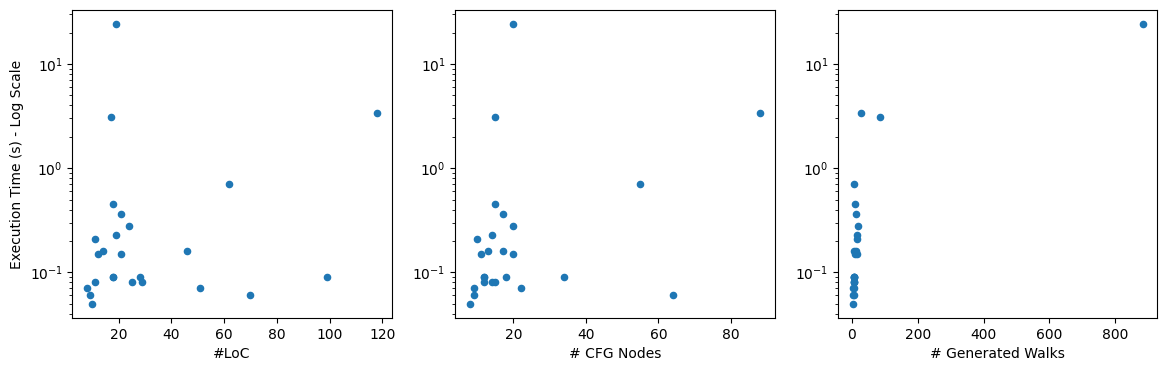

In [216]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 4))

avg_df.plot.scatter(x='#LoC', y='Execution Time (s)', logy=True, ax=axes[0], subplots=True, legend=False)
avg_df.plot.scatter(x='# CFG Nodes', y='Execution Time (s)', logy=True, ax=axes[1], subplots=True, legend=False)
avg_df.plot.scatter(x='# Generated Walks', y='Execution Time (s)', logy=True, ax=axes[2], subplots=True, legend= False)

axes[0].set_ylabel('Execution Time (s) - Log Scale')
axes[1].set_ylabel('')
axes[2].set_ylabel('')

plt.savefig('/tmp/execution-time.png', dpi=300)

plt.show()

In [219]:
avg_df.corr(numeric_only=True, method='pearson').round(2)

,#LoC,# Generated Walks,# CFG Nodes,Execution Time (s)
#LoC,1.00,-0.09,0.88,-0.01
# Generated Walks,-0.09,1.00,-0.01,0.99
# CFG Nodes,0.88,-0.01,1.00,0.08
Execution Time (s),-0.01,0.99,0.08,1.00


In [220]:
avg_df.corr(numeric_only=True, method='kendall').round(2)

,#LoC,# Generated Walks,# CFG Nodes,Execution Time (s)
#LoC,1.00,0.03,0.76,0.12
# Generated Walks,0.03,1.00,0.18,0.78
# CFG Nodes,0.76,0.18,1.00,0.30
Execution Time (s),0.12,0.78,0.30,1.00


In [221]:
avg_df.corr(numeric_only=True, method='spearman').round(2)

,#LoC,# Generated Walks,# CFG Nodes,Execution Time (s)
#LoC,1.00,0.05,0.90,0.20
# Generated Walks,0.05,1.00,0.21,0.90
# CFG Nodes,0.90,0.21,1.00,0.39
Execution Time (s),0.20,0.90,0.39,1.00


# Generate Latex Table

In [223]:
print(avg_df.to_latex(index=False, float_format="{:.2f}".format).replace('\\\\', '\\\\ \\hline'))

\begin{tabular}{lrrrr}
\toprule
Smart Contract & #LoC & # Generated Walks & # CFG Nodes & Execution Time (s) \\ \hline
\midrule
Mutant Killing & 11 & 6 & 12 & 0.08 \\ \hline
Simple Mapping & 18 & 11 & 15 & 0.45 \\ \hline
Two Tx Ovf & 24 & 19 & 20 & 0.28 \\ \hline
Simple Condition Checking & 8 & 6 & 9 & 0.07 \\ \hline
Simple Msg Value & 9 & 5 & 9 & 0.06 \\ \hline
Simple Int Overflow & 11 & 15 & 10 & 0.21 \\ \hline
Mapping Sample & 12 & 10 & 11 & 0.15 \\ \hline
Dummy Mono X & 21 & 13 & 17 & 0.36 \\ \hline
Multi Tx 5 & 19 & 884 & 20 & 24.30 \\ \hline
Internal Call & 21 & 15 & 20 & 0.15 \\ \hline
Safe Math & 46 & 13 & 17 & 0.16 \\ \hline
Erc20 & 118 & 28 & 88 & 3.41 \\ \hline
Fuzzing & 14 & 8 & 13 & 0.16 \\ \hline
Kill Billy & 19 & 17 & 14 & 0.23 \\ \hline
Math Open Zeppelin & 62 & 8 & 55 & 0.70 \\ \hline
Safe Remote Purchase & 99 & 6 & 34 & 0.09 \\ \hline
Unprotected & 29 & 7 & 14 & 0.08 \\ \hline
Address Book & 10 & 4 & 8 & 0.05 \\ \hline
Hotel Room & 51 & 4 & 22 & 0.07 \\ \hline
Shared 